In [6]:
import os
import numpy as np
import pandas as pd
from itertools import chain

data_dir = '../result/GCN_fix_tree/SE/GCN_tree_diff/IBD'
outdir = '../result/predict_IBD'
if not os.path.exists(outdir):
    os.makedirs(outdir)
p_files = [os.path.join(data_dir, cohort, f'p_{cohort}.tsv') for cohort in os.listdir(data_dir)]

all_significant = []
for p_file in p_files:
    p_df = pd.read_csv(p_file, sep='\t')
    significant_clusters = p_df[p_df['p_adj'] < 0.05]['Unnamed: 0'].tolist()
    all_significant.append(significant_clusters)

significant_clusters = []
for cluster in set(chain(*all_significant)):
    if sum(cluster in s for s in all_significant) >= 2:
        significant_clusters.append(cluster)

print(f"Significant clusters: {significant_clusters}")

Significant clusters: ['cluster_S1-C16', 'cluster_S1-C5', 'cluster_S1-C20', 'supercluster_S3', 'supercluster_S2', 'cluster_S1-C15', 'supercluster_S6', 'cluster_S1-C10', 'cluster_S2-C4', 'root', 'cluster_S2-C5', 'cluster_S1-C1', 'cluster_S1-C3', 'cluster_S6-C3', 'cluster_S1-C9', 'cluster_S1-C22', 'cluster_S6-C1', 'cluster_S1-C17', 'cluster_S1-C4']


In [7]:
import os
import pandas as pd

def get_cluster_data(data_dir):
    cluster_data = pd.DataFrame()
    
    for cohort_folder in os.listdir(data_dir):
        if cohort_folder.startswith('IBD'):
            cohort_path = os.path.join(data_dir, cohort_folder)
            
            crc_df = pd.read_csv(os.path.join(cohort_path, 'se_IBD.tsv'), sep='\t')
            crc_df['cohort'] = cohort_folder
            crc_df['label'] = 1
            crc_df = crc_df.rename(columns={'Unnamed: 0': 'sample'})
            
            health_df = pd.read_csv(os.path.join(cohort_path, 'se_Health.tsv'), sep='\t')
            health_df['cohort'] = cohort_folder
            health_df['label'] = 0
            health_df = health_df.rename(columns={'Unnamed: 0': 'sample'})
            

            cohort_data = pd.concat([crc_df, health_df], ignore_index=True)
            
            cluster_data = pd.concat([cluster_data, cohort_data], ignore_index=True)
    
    return cluster_data

cluster_df = get_cluster_data('../result/GCN_fix_tree/SE/GCN_tree_diff/IBD')
print(cluster_df.columns)

Index(['sample', 'cluster_S1-C1', 'cluster_S1-C2', 'cluster_S1-C3',
       'cluster_S1-C4', 'cluster_S1-C5', 'cluster_S1-C6', 'cluster_S1-C7',
       'cluster_S1-C8', 'cluster_S1-C9', 'cluster_S1-C10', 'cluster_S1-C11',
       'cluster_S1-C12', 'cluster_S1-C13', 'cluster_S1-C14', 'cluster_S1-C15',
       'cluster_S1-C16', 'cluster_S1-C17', 'cluster_S1-C18', 'cluster_S1-C19',
       'cluster_S1-C20', 'cluster_S1-C21', 'cluster_S1-C22', 'cluster_S1-C23',
       'cluster_S1-C24', 'cluster_S1-C25', 'cluster_S1-C26', 'cluster_S1-C27',
       'cluster_S1-C28', 'cluster_S2-C1', 'cluster_S2-C2', 'cluster_S2-C3',
       'cluster_S2-C4', 'cluster_S2-C5', 'cluster_S2-C6', 'cluster_S2-C7',
       'cluster_S2-C8', 'cluster_S3-C1', 'cluster_S3-C2', 'cluster_S3-C3',
       'cluster_S3-C4', 'cluster_S3-C5', 'cluster_S4-C1', 'cluster_S4-C2',
       'cluster_S4-C3', 'cluster_S4-C4', 'cluster_S5-C1', 'cluster_S5-C2',
       'cluster_S5-C3', 'cluster_S5-C4', 'cluster_S6-C1', 'cluster_S6-C2',
       'clust

In [8]:
cluster_df

,sample,cluster_S1-C1,cluster_S1-C2,cluster_S1-C3,cluster_S1-C4,cluster_S1-C5,cluster_S1-C6,cluster_S1-C7,cluster_S1-C8,cluster_S1-C9,...,cluster_C10,supercluster_S1,supercluster_S2,supercluster_S3,supercluster_S4,supercluster_S5,supercluster_S6,root,cohort,label
0,O2_UC1_0,0.796466,0.711382,0.832932,0.000000,0.827484,0.0,0.0,0.000000,0.000000,...,0.0,4.260717,0.000000,0.000000,0.0,0.000000,0.121642,4.467539,IBD1,1
1,O2_UC1_2,1.706055,0.756211,0.547579,0.028005,0.497236,0.0,0.0,0.032332,0.016331,...,0.0,5.121196,0.082348,0.006400,0.0,0.001147,0.083761,5.395331,IBD1,1
2,O2_UC11_0,0.773455,0.479089,0.011185,0.001114,0.337710,0.0,0.0,0.000000,0.049716,...,0.0,3.187199,0.072793,0.000000,0.0,0.014731,0.112822,3.496059,IBD1,1
3,O2_UC11_2,1.131062,0.507389,0.021439,0.017918,0.551432,0.0,0.0,0.004409,0.104804,...,0.0,3.720254,0.451402,0.002169,0.0,0.008370,0.222712,4.641129,IBD1,1
4,O2_UC12_0,1.088969,0.900235,0.478153,0.000000,0.937700,0.0,0.0,0.042155,0.039987,...,0.0,4.763208,0.046481,0.009513,0.0,0.000000,0.235498,5.221071,IBD1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,MSMAPC5H,0.009414,0.173072,0.105758,0.000000,2.641952,0.0,0.0,0.006305,0.000000,...,0.0,3.723121,0.000089,0.000000,0.0,0.000000,0.004572,3.731993,IBD3,0
1510,MSMAPC5L,0.036130,0.266698,0.062717,0.000000,2.564664,0.0,0.0,0.009545,0.000000,...,0.0,3.645266,0.000093,0.000000,0.0,0.000331,0.011414,3.667425,IBD3,0
1511,MSMB4LXW,0.287737,0.466351,0.005731,0.000000,2.264635,0.0,0.0,0.011899,0.000000,...,0.0,3.733347,0.030587,0.003998,0.0,0.000000,0.052313,3.881559,IBD3,0
1512,MSMB4LXS,0.186182,0.396476,0.000000,0.000000,2.075106,0.0,0.0,0.000000,0.000000,...,0.0,2.943979,0.026352,0.000000,0.0,0.001138,0.080657,3.118743,IBD3,0


Excluding cohort: IBD1
Training data shape: (1121, 22)
Validation data shape: (393, 22)
Training AUC: 1.00
Validation AUC: 0.69


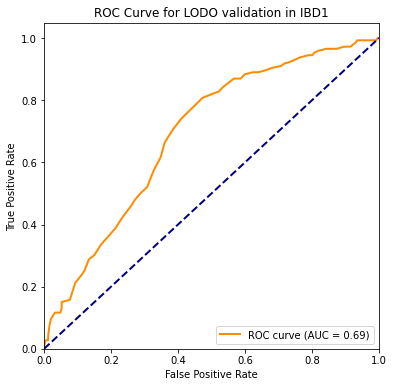


Excluding cohort: IBD2
Training data shape: (1255, 22)
Validation data shape: (259, 22)
Training AUC: 1.00
Validation AUC: 0.68


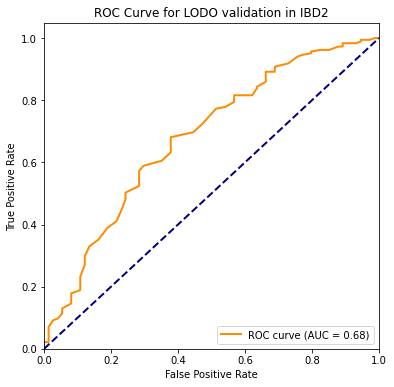


Excluding cohort: IBD3
Training data shape: (652, 22)
Validation data shape: (862, 22)
Training AUC: 1.00
Validation AUC: 0.76


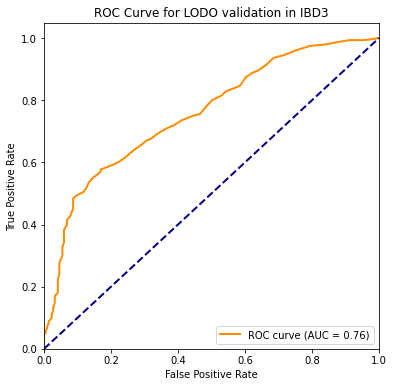


Feature Importance Sum:
cluster_S1-C15: 0.3513
cluster_S1-C3: 0.3083
cluster_S1-C1: 0.2774
cluster_S1-C20: 0.2391
root: 0.2200
cluster_S1-C5: 0.1720
cluster_S1-C10: 0.1694
cluster_S1-C16: 0.1628
supercluster_S6: 0.1628
supercluster_S2: 0.1559
cluster_S1-C9: 0.1316
cluster_S2-C5: 0.1259
supercluster_S3: 0.1210
cluster_S6-C1: 0.1147
cluster_S6-C3: 0.0784
cluster_S1-C17: 0.0637
cluster_S1-C4: 0.0588
cluster_S1-C22: 0.0489
cluster_S2-C4: 0.0381
Validation AUC: 0.71 +/- 0.03


In [9]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

selected_columns = significant_clusters + ['sample', 'cohort', 'label']
#cluster_df = cluster_df[cluster_df['cohort'] != 'IBD1']
selected_df = cluster_df[selected_columns]

feature_importance_sum = {feature: 0 for feature in significant_clusters}

validation_auc_results = []

df = pd.DataFrame(columns=sorted(selected_df['cohort'].unique()), index=significant_clusters)
for exclude_cohort in [f'IBD{i}' for i in range(1, 4)]:
    print(f"Excluding cohort: {exclude_cohort}")
    
    train_df = selected_df[selected_df['cohort'] != exclude_cohort]
    val_df = selected_df[selected_df['cohort'] == exclude_cohort]
    
    print("Training data shape:", train_df.shape)
    print("Validation data shape:", val_df.shape)
    
    X_train = train_df[significant_clusters]
    y_train = train_df['label']
    
    rf = RandomForestClassifier(random_state=24)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_train)[:, 1]
    train_auc = roc_auc_score(y_train, y_pred)
    print(f"Training AUC: {train_auc:.2f}")

    X_val = val_df[significant_clusters]
    y_val = val_df['label']
    y_pred = rf.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, y_pred)
    print(f"Validation AUC: {val_auc:.2f}")

    fpr, tpr, _ = roc_curve(y_val, y_pred)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % val_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for LODO validation in {exclude_cohort}')
    plt.legend(loc="lower right")
    
    plt.savefig(os.path.join(outdir, '{}.recurrent.LODO.roc_curve.svg'.format(exclude_cohort)), format='svg')
    plt.show()
    
    for feature, importance in zip(significant_clusters, rf.feature_importances_):
        df.loc[feature, exclude_cohort] = importance
        feature_importance_sum[feature] += importance
    
    validation_auc_results.append(val_auc)
    
    print()

print("Feature Importance Sum:")
for feature, importance_sum in sorted(feature_importance_sum.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance_sum:.4f}")

print(f"Validation AUC: {np.mean(validation_auc_results):.2f} +/- {np.std(validation_auc_results):.2f}")

In [10]:
df.to_csv(os.path.join(outdir, 'feature_importance_sum.tsv'), sep='\t')